In [1]:
import numpy as np
f = open('resources/InsectWingbeatSound/InsectWingbeatSound_TEST','r')
data = f.read()
f.close()
# 개행문자 기준으로 끊어서 리스트로
data_list = data.split('\n')

# "," 기준으로 끊어서 리스트로
emptylist = []
for list_part in data_list:
    emptylist.append(list_part.split(","))

In [2]:
# str -> float 변환
tofloat = []
for partlist in emptylist:
    tofloat.append([float(i) for i in partlist]) 

In [3]:
labels = []
data_list = []
for datas in tofloat:
    labels.append(datas[0])
    data_list.append(datas[1:])
print(np.shape(labels))
print(np.shape(data_list))


(1980,)
(1980, 256)


In [45]:
print(max(labels))
print(min(labels))

11.0
1.0


In [4]:
from readFile import split_into_values, toRPdata
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

def Standard(data):
    SS = StandardScaler().fit(data)
    scaled = SS.transform(data)
    return scaled

def MinMax(data):
    MMS = MinMaxScaler().fit(data)
    scaled = MMS.transform(data)
    return scaled

# result_list transpose
result_T = [list(x) for x in zip(*data_list)]

# minmax 정규화
result_scaled = Standard(result_T)

# 다시 result transpose 해서 원래대로
result_scaled = [list(x) for x in zip(*result_scaled)]

result_ = np.array(result_scaled)

In [5]:
result_.shape

(1980, 256)

In [6]:
data = result_.reshape(result_.shape[0], 1, result_.shape[1])
X = toRPdata(data, threshold='point', percentage=30)
#X = toRPdata(data)
    
X_scaled = np.expand_dims(X, axis=3)
X_scaled.shape

(1980, 256, 256, 1)

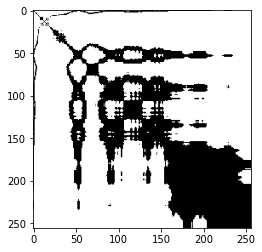

In [7]:
from matplotlib import pyplot as plt
plt.imshow(X[0], cmap='Greys')

In [164]:
learning_rate = 3e-5
optimizer='Adam'
loss='mse'
image_size = 256 #1024, 256
dimension = 32 # ...

In [165]:
batch_size = 10
epochs = 5000

In [166]:
from utils import split_data, normalization_tool
from agent import Autoencoder_Agent
from keras import backend as K
import tensorflow as tf
# X_train, X_test, Y_train, Y_test = split_data(X_scaled, X_scaled) #데이터 분리

mirrored_strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"], cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())
with mirrored_strategy.scope():
    autoencoder = Autoencoder_Agent(model_size=image_size, dimension=dimension, optimizer=optimizer,learning_rate=learning_rate)
    hist = autoencoder.train(X_train,batch_size,epochs,X_test)
#     feature = autoencoder.feature_extract(X_scaled)
#     print(feature)
#     print(feature.shape)
# with tf.device('/cpu:0'):
#     autoencoder = Autoencoder_Agent(model_size=image_size, dimension=dimension, optimizer=optimizer,learning_rate=learning_rate)
#     hist = autoencoder.train(X_train,batch_size,epochs,X_test)
#     feature = autoencoder.feature_extract(X_scaled)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 256, 256, 64)      640       
_________________________________________________________________
activation_9 (Activation)    (None, 256, 256, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 128, 32)      18464     
_________________________________________________________________
activation_10 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6

149/149 [==============================] - ETA: 0s - loss: 0.1921
Epoch 00013: val_loss improved from 0.19199 to 0.19150, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 10s 64ms/step - loss: 0.1921 - val_loss: 0.1915
Epoch 14/5000
149/149 [==============================] - ETA: 0s - loss: 0.1917
Epoch 00014: val_loss improved from 0.19150 to 0.19117, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 10s 65ms/step - loss: 0.1917 - val_loss: 0.1912
Epoch 15/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1913
Epoch 00015: val_loss improved from 0.19117 to 0.19081, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 10s 65ms/step - loss: 0.1913 - val_loss: 0.1908
Epoch 16/5000
1

149/149 [==============================] - 10s 65ms/step - loss: 0.1870 - val_loss: 0.1869
Epoch 38/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1869
Epoch 00038: val_loss improved from 0.18694 to 0.18679, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 10s 65ms/step - loss: 0.1869 - val_loss: 0.1868
Epoch 39/5000
149/149 [==============================] - ETA: 0s - loss: 0.1868
Epoch 00039: val_loss improved from 0.18679 to 0.18678, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 9s 63ms/step - loss: 0.1868 - val_loss: 0.1868
Epoch 40/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1867
Epoch 00040: val_loss improved from 0.18678 to 0.18665, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
14

148/149 [============================>.] - ETA: 0s - loss: 0.1849
Epoch 00064: val_loss improved from 0.18514 to 0.18508, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 10s 65ms/step - loss: 0.1849 - val_loss: 0.1851
Epoch 65/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1848
Epoch 00065: val_loss did not improve from 0.18508
149/149 [==============================] - 7s 47ms/step - loss: 0.1848 - val_loss: 0.1851
Epoch 66/5000
149/149 [==============================] - ETA: 0s - loss: 0.1848
Epoch 00066: val_loss improved from 0.18508 to 0.18497, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 9s 63ms/step - loss: 0.1848 - val_loss: 0.1850
Epoch 67/5000
149/149 [==============================] - ETA: 0s - loss: 0.1847
Epoch 00067: val_loss did not improve from 0.184

Epoch 92/5000
149/149 [==============================] - ETA: 0s - loss: 0.1835
Epoch 00092: val_loss improved from 0.18377 to 0.18377, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 10s 65ms/step - loss: 0.1835 - val_loss: 0.1838
Epoch 93/5000
149/149 [==============================] - ETA: 0s - loss: 0.1835
Epoch 00093: val_loss improved from 0.18377 to 0.18369, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 10s 65ms/step - loss: 0.1835 - val_loss: 0.1837
Epoch 94/5000
149/149 [==============================] - ETA: 0s - loss: 0.1835
Epoch 00094: val_loss did not improve from 0.18369
149/149 [==============================] - 7s 46ms/step - loss: 0.1835 - val_loss: 0.1839
Epoch 95/5000
149/149 [==============================] - ETA: 0s - loss: 0.1834
Epoch 00095: val_loss improved fr

Epoch 120/5000
149/149 [==============================] - ETA: 0s - loss: 0.1825
Epoch 00120: val_loss improved from 0.18293 to 0.18293, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 9s 63ms/step - loss: 0.1825 - val_loss: 0.1829
Epoch 121/5000
149/149 [==============================] - ETA: 0s - loss: 0.1825
Epoch 00121: val_loss improved from 0.18293 to 0.18288, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 10s 65ms/step - loss: 0.1825 - val_loss: 0.1829
Epoch 122/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1824
Epoch 00122: val_loss improved from 0.18288 to 0.18277, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 10s 64ms/step - loss: 0.1824 - val_loss: 0.1828

Epoch 149/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1817
Epoch 00149: val_loss did not improve from 0.18219
149/149 [==============================] - 7s 47ms/step - loss: 0.1817 - val_loss: 0.1822
Epoch 150/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1817
Epoch 00150: val_loss improved from 0.18219 to 0.18211, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 10s 65ms/step - loss: 0.1816 - val_loss: 0.1821
Epoch 151/5000
149/149 [==============================] - ETA: 0s - loss: 0.1816
Epoch 00151: val_loss did not improve from 0.18211
149/149 [==============================] - 7s 46ms/step - loss: 0.1816 - val_loss: 0.1821
Epoch 152/5000
149/149 [==============================] - ETA: 0s - loss: 0.1816
Epoch 00152: val_loss improved from 0.18211 to 0.18206, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing

Epoch 177/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1811
Epoch 00177: val_loss improved from 0.18162 to 0.18158, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 10s 65ms/step - loss: 0.1810 - val_loss: 0.1816
Epoch 178/5000
149/149 [==============================] - ETA: 0s - loss: 0.1810
Epoch 00178: val_loss improved from 0.18158 to 0.18157, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 9s 63ms/step - loss: 0.1810 - val_loss: 0.1816
Epoch 179/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1809
Epoch 00179: val_loss did not improve from 0.18157
149/149 [==============================] - 7s 47ms/step - loss: 0.1810 - val_loss: 0.1817
Epoch 180/5000
149/149 [==============================] - ETA: 0s - loss: 0.1810
Epoch 00180: val_loss did not 

INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 10s 64ms/step - loss: 0.1804 - val_loss: 0.1811
Epoch 209/5000
149/149 [==============================] - ETA: 0s - loss: 0.1803
Epoch 00209: val_loss did not improve from 0.18107
149/149 [==============================] - 7s 47ms/step - loss: 0.1803 - val_loss: 0.1811
Epoch 210/5000
149/149 [==============================] - ETA: 0s - loss: 0.1803
Epoch 00210: val_loss improved from 0.18107 to 0.18098, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 10s 65ms/step - loss: 0.1803 - val_loss: 0.1810
Epoch 211/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1803
Epoch 00211: val_loss did not improve from 0.18098
149/149 [==============================] - 7s 47ms/step - loss: 0.1803 - val_loss: 0.1810
Epoch 212/5000
149/149 [==============================] - ETA: 0s

Epoch 239/5000
149/149 [==============================] - ETA: 0s - loss: 0.1798
Epoch 00239: val_loss did not improve from 0.18055
149/149 [==============================] - 7s 47ms/step - loss: 0.1798 - val_loss: 0.1806
Epoch 240/5000
149/149 [==============================] - ETA: 0s - loss: 0.1798
Epoch 00240: val_loss did not improve from 0.18055
149/149 [==============================] - 7s 46ms/step - loss: 0.1798 - val_loss: 0.1806
Epoch 241/5000
149/149 [==============================] - ETA: 0s - loss: 0.1797
Epoch 00241: val_loss improved from 0.18055 to 0.18051, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 9s 64ms/step - loss: 0.1797 - val_loss: 0.1805
Epoch 242/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1797
Epoch 00242: val_loss did not improve from 0.18051
149/149 [==============================] - 7s 47ms/step - loss: 0.1797 - val_loss: 0.1806
E

149/149 [==============================] - 10s 65ms/step - loss: 0.1793 - val_loss: 0.1801
Epoch 271/5000
149/149 [==============================] - ETA: 0s - loss: 0.1792
Epoch 00271: val_loss improved from 0.18012 to 0.18011, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 10s 65ms/step - loss: 0.1792 - val_loss: 0.1801
Epoch 272/5000
149/149 [==============================] - ETA: 0s - loss: 0.1792
Epoch 00272: val_loss did not improve from 0.18011
149/149 [==============================] - 7s 47ms/step - loss: 0.1792 - val_loss: 0.1802
Epoch 273/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1792
Epoch 00273: val_loss improved from 0.18011 to 0.18006, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 10s 64ms/step - loss: 0.1792 - val_loss: 0.1801
Epoch 274/5000
149/

Epoch 302/5000
149/149 [==============================] - ETA: 0s - loss: 0.1787
Epoch 00302: val_loss did not improve from 0.17971
149/149 [==============================] - 7s 46ms/step - loss: 0.1787 - val_loss: 0.1799
Epoch 303/5000
149/149 [==============================] - ETA: 0s - loss: 0.1787
Epoch 00303: val_loss did not improve from 0.17971
149/149 [==============================] - 7s 46ms/step - loss: 0.1787 - val_loss: 0.1799
Epoch 304/5000
149/149 [==============================] - ETA: 0s - loss: 0.1786
Epoch 00304: val_loss improved from 0.17971 to 0.17970, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 10s 65ms/step - loss: 0.1786 - val_loss: 0.1797
Epoch 305/5000
149/149 [==============================] - ETA: 0s - loss: 0.1786
Epoch 00305: val_loss did not improve from 0.17970
149/149 [==============================] - 7s 46ms/step - loss: 0.1786 - val_loss: 0.1797


149/149 [==============================] - ETA: 0s - loss: 0.1782- ETA: 0s - loss: 
Epoch 00335: val_loss did not improve from 0.17935
149/149 [==============================] - 7s 46ms/step - loss: 0.1782 - val_loss: 0.1794
Epoch 336/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1782
Epoch 00336: val_loss did not improve from 0.17935
149/149 [==============================] - 7s 46ms/step - loss: 0.1782 - val_loss: 0.1794
Epoch 337/5000
149/149 [==============================] - ETA: 0s - loss: 0.1781
Epoch 00337: val_loss improved from 0.17935 to 0.17930, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 9s 64ms/step - loss: 0.1781 - val_loss: 0.1793
Epoch 338/5000
149/149 [==============================] - ETA: 0s - loss: 0.1781
Epoch 00338: val_loss did not improve from 0.17930
149/149 [==============================] - 7s 46ms/step - loss: 0.1781 - val_loss: 0.179

Epoch 369/5000
149/149 [==============================] - ETA: 0s - loss: 0.1777
Epoch 00369: val_loss improved from 0.17906 to 0.17899, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 10s 66ms/step - loss: 0.1777 - val_loss: 0.1790
Epoch 370/5000
149/149 [==============================] - ETA: 0s - loss: 0.1777
Epoch 00370: val_loss did not improve from 0.17899
149/149 [==============================] - 7s 46ms/step - loss: 0.1777 - val_loss: 0.1791
Epoch 371/5000
149/149 [==============================] - ETA: 0s - loss: 0.1777
Epoch 00371: val_loss did not improve from 0.17899
149/149 [==============================] - 7s 46ms/step - loss: 0.1777 - val_loss: 0.1792
Epoch 372/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1777
Epoch 00372: val_loss did not improve from 0.17899
149/149 [==============================] - 7s 47ms/step - loss: 0.1777 - val_loss: 0.1790


Epoch 403/5000
149/149 [==============================] - ETA: 0s - loss: 0.1773
Epoch 00403: val_loss improved from 0.17884 to 0.17881, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 10s 64ms/step - loss: 0.1773 - val_loss: 0.1788
Epoch 404/5000
149/149 [==============================] - ETA: 0s - loss: 0.1773
Epoch 00404: val_loss improved from 0.17881 to 0.17878, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 10s 65ms/step - loss: 0.1773 - val_loss: 0.1788
Epoch 405/5000
149/149 [==============================] - ETA: 0s - loss: 0.1773
Epoch 00405: val_loss improved from 0.17878 to 0.17876, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 10s 64ms/step - loss: 0.1773 - val_loss: 0.178

149/149 [==============================] - ETA: 0s - loss: 0.1769
Epoch 00435: val_loss did not improve from 0.17863
149/149 [==============================] - 7s 46ms/step - loss: 0.1769 - val_loss: 0.1788
Epoch 436/5000
149/149 [==============================] - ETA: 0s - loss: 0.1769
Epoch 00436: val_loss did not improve from 0.17863
149/149 [==============================] - 7s 46ms/step - loss: 0.1769 - val_loss: 0.1787
Epoch 437/5000
149/149 [==============================] - ETA: 0s - loss: 0.1769
Epoch 00437: val_loss improved from 0.17863 to 0.17862, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 9s 63ms/step - loss: 0.1769 - val_loss: 0.1786
Epoch 438/5000
149/149 [==============================] - ETA: 0s - loss: 0.1769
Epoch 00438: val_loss did not improve from 0.17862
149/149 [==============================] - 7s 47ms/step - loss: 0.1769 - val_loss: 0.1788
Epoch 439/5000
1

Epoch 469/5000
149/149 [==============================] - ETA: 0s - loss: 0.1766
Epoch 00469: val_loss improved from 0.17848 to 0.17847, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 10s 65ms/step - loss: 0.1766 - val_loss: 0.1785
Epoch 470/5000
149/149 [==============================] - ETA: 0s - loss: 0.1766
Epoch 00470: val_loss did not improve from 0.17847
149/149 [==============================] - 7s 46ms/step - loss: 0.1766 - val_loss: 0.1786
Epoch 471/5000
149/149 [==============================] - ETA: 0s - loss: 0.1766
Epoch 00471: val_loss did not improve from 0.17847
149/149 [==============================] - 7s 46ms/step - loss: 0.1766 - val_loss: 0.1786
Epoch 472/5000
149/149 [==============================] - ETA: 0s - loss: 0.1766
Epoch 00472: val_loss did not improve from 0.17847
149/149 [==============================] - 7s 46ms/step - loss: 0.1766 - val_loss: 0.1785


Epoch 504/5000
149/149 [==============================] - ETA: 0s - loss: 0.1762
Epoch 00504: val_loss did not improve from 0.17838
149/149 [==============================] - 7s 46ms/step - loss: 0.1762 - val_loss: 0.1784
Epoch 505/5000
149/149 [==============================] - ETA: 0s - loss: 0.1762
Epoch 00505: val_loss did not improve from 0.17838
149/149 [==============================] - 7s 47ms/step - loss: 0.1762 - val_loss: 0.1784
Epoch 506/5000
149/149 [==============================] - ETA: 0s - loss: 0.1762
Epoch 00506: val_loss improved from 0.17838 to 0.17837, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 10s 65ms/step - loss: 0.1762 - val_loss: 0.1784
Epoch 507/5000
149/149 [==============================] - ETA: 0s - loss: 0.1762
Epoch 00507: val_loss did not improve from 0.17837
149/149 [==============================] - 7s 47ms/step - loss: 0.1762 - val_loss: 0.1784


Epoch 539/5000
149/149 [==============================] - ETA: 0s - loss: 0.1759
Epoch 00539: val_loss did not improve from 0.17824
149/149 [==============================] - 7s 46ms/step - loss: 0.1759 - val_loss: 0.1783
Epoch 540/5000
149/149 [==============================] - ETA: 0s - loss: 0.1759
Epoch 00540: val_loss did not improve from 0.17824
149/149 [==============================] - 7s 46ms/step - loss: 0.1759 - val_loss: 0.1783
Epoch 541/5000
149/149 [==============================] - ETA: 0s - loss: 0.1760
Epoch 00541: val_loss did not improve from 0.17824
149/149 [==============================] - 7s 47ms/step - loss: 0.1760 - val_loss: 0.1784
Epoch 542/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1760
Epoch 00542: val_loss did not improve from 0.17824
149/149 [==============================] - 7s 47ms/step - loss: 0.1759 - val_loss: 0.1784
Epoch 543/5000
149/149 [==============================] - ETA: 0s - loss: 0.1759
Epoch 00543: val_loss did not i

Epoch 575/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1756
Epoch 00575: val_loss did not improve from 0.17816
149/149 [==============================] - 7s 46ms/step - loss: 0.1756 - val_loss: 0.1785
Epoch 576/5000
149/149 [==============================] - ETA: 0s - loss: 0.1757
Epoch 00576: val_loss did not improve from 0.17816
149/149 [==============================] - 7s 47ms/step - loss: 0.1757 - val_loss: 0.1783
Epoch 577/5000
149/149 [==============================] - ETA: 0s - loss: 0.1756
Epoch 00577: val_loss improved from 0.17816 to 0.17815, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 10s 64ms/step - loss: 0.1756 - val_loss: 0.1782
Epoch 578/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1755
Epoch 00578: val_loss did not improve from 0.17815
149/149 [==============================] - 7s 47ms/step - loss: 0.1756 - val_loss: 0.1783


149/149 [==============================] - ETA: 0s - loss: 0.1753
Epoch 00609: val_loss did not improve from 0.17810
149/149 [==============================] - 7s 46ms/step - loss: 0.1753 - val_loss: 0.1781
Epoch 610/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1753
Epoch 00610: val_loss did not improve from 0.17810
149/149 [==============================] - 7s 47ms/step - loss: 0.1753 - val_loss: 0.1781
Epoch 611/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1753
Epoch 00611: val_loss did not improve from 0.17810
149/149 [==============================] - 7s 46ms/step - loss: 0.1753 - val_loss: 0.1782
Epoch 612/5000
149/149 [==============================] - ETA: 0s - loss: 0.1753
Epoch 00612: val_loss did not improve from 0.17810
149/149 [==============================] - 7s 46ms/step - loss: 0.1753 - val_loss: 0.1781
Epoch 613/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1753
Epoch 00613: val_loss did not improve from 0.1

Epoch 645/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1752- ETA: 1s - 
Epoch 00645: val_loss did not improve from 0.17809
149/149 [==============================] - 7s 47ms/step - loss: 0.1751 - val_loss: 0.1782
Epoch 646/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1751
Epoch 00646: val_loss did not improve from 0.17809
149/149 [==============================] - 7s 47ms/step - loss: 0.1751 - val_loss: 0.1783
Epoch 647/5000
149/149 [==============================] - ETA: 0s - loss: 0.1751- ETA: 1s -
Epoch 00647: val_loss did not improve from 0.17809
149/149 [==============================] - 7s 46ms/step - loss: 0.1751 - val_loss: 0.1781
Epoch 648/5000
149/149 [==============================] - ETA: 0s - loss: 0.1750- 
Epoch 00648: val_loss did not improve from 0.17809
149/149 [==============================] - 7s 47ms/step - loss: 0.1750 - val_loss: 0.1781
Epoch 649/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1750
Epoch 

149/149 [==============================] - ETA: 0s - loss: 0.1748
Epoch 00680: val_loss did not improve from 0.17802
149/149 [==============================] - 7s 46ms/step - loss: 0.1748 - val_loss: 0.1783
Epoch 681/5000
149/149 [==============================] - ETA: 0s - loss: 0.1748
Epoch 00681: val_loss did not improve from 0.17802
149/149 [==============================] - 7s 46ms/step - loss: 0.1748 - val_loss: 0.1781
Epoch 682/5000
149/149 [==============================] - ETA: 0s - loss: 0.1748
Epoch 00682: val_loss did not improve from 0.17802
149/149 [==============================] - 7s 46ms/step - loss: 0.1748 - val_loss: 0.1782
Epoch 683/5000
149/149 [==============================] - ETA: 0s - loss: 0.1747
Epoch 00683: val_loss did not improve from 0.17802
149/149 [==============================] - 7s 46ms/step - loss: 0.1747 - val_loss: 0.1781
Epoch 684/5000
149/149 [==============================] - ETA: 0s - loss: 0.1748
Epoch 00684: val_loss did not improve from 0.1

Epoch 717/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1745
Epoch 00717: val_loss did not improve from 0.17800
149/149 [==============================] - 7s 46ms/step - loss: 0.1745 - val_loss: 0.1782
Epoch 718/5000
149/149 [==============================] - ETA: 0s - loss: 0.1745
Epoch 00718: val_loss did not improve from 0.17800
149/149 [==============================] - 7s 46ms/step - loss: 0.1745 - val_loss: 0.1780
Epoch 719/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1745
Epoch 00719: val_loss did not improve from 0.17800
149/149 [==============================] - 7s 47ms/step - loss: 0.1745 - val_loss: 0.1783
Epoch 720/5000
149/149 [==============================] - ETA: 0s - loss: 0.1745
Epoch 00720: val_loss did not improve from 0.17800
149/149 [==============================] - 7s 47ms/step - loss: 0.1745 - val_loss: 0.1781
Epoch 721/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1744
Epoch 00721: val_loss did not i

149/149 [==============================] - ETA: 0s - loss: 0.1743- ETA: 0s - loss: 0.17
Epoch 00753: val_loss did not improve from 0.17799
149/149 [==============================] - 7s 47ms/step - loss: 0.1743 - val_loss: 0.1782
Epoch 754/5000
148/149 [============================>.] - ETA: 0s - loss: 0.1742
Epoch 00754: val_loss did not improve from 0.17799
149/149 [==============================] - 7s 47ms/step - loss: 0.1743 - val_loss: 0.1783
Epoch 755/5000
149/149 [==============================] - ETA: 0s - loss: 0.1743
Epoch 00755: val_loss improved from 0.17799 to 0.17797, saving model to insectWing_dimension_32
INFO:tensorflow:Assets written to: insectWing_dimension_32\assets
149/149 [==============================] - 10s 65ms/step - loss: 0.1743 - val_loss: 0.1780
Epoch 756/5000
149/149 [==============================] - ETA: 0s - loss: 0.1743- ETA: 1s - loss: 0 - ETA
Epoch 00756: val_loss did not improve from 0.17797
149/149 [==============================] - 7s 47ms/step - 

In [168]:
it = int(1980 / 90) 
all_feature = np.array(autoencoder.feature_extract(X_scaled[0:90]))
for i in range(1, it):
    feature = autoencoder.feature_extract(X_scaled[i*90:(i+1)*90])
    all_feature = np.concatenate([all_feature, feature])
print(all_feature)
print(all_feature.shape)

[[0.5426777  1.3637911  0.69103944 ... 1.4133849  0.6630458  0.4351191 ]
 [0.45535094 1.4154513  0.679445   ... 1.0028305  0.81870824 1.0998008 ]
 [0.5946441  1.3743628  0.7022789  ... 1.1835222  0.6584817  1.0513363 ]
 ...
 [0.60325295 1.3923582  0.6340449  ... 1.3233216  0.76825076 0.30604514]
 [0.4415038  1.4538145  0.5518131  ... 1.2354184  0.7139132  0.48680735]
 [0.62632644 1.3481513  0.61757046 ... 1.2296057  0.65657836 1.2373903 ]]
(1980, 32)


In [41]:
array4 = array1.reshape(1, 3)  # [[1,2,3]]
array5 = array2.reshape(1, 3)  # [[4,5,6]]

# 2차원 배열을 위아래로 합치기

array6 = np.concatenate([array4, array5], axis=0)
print(array6.shape)
print(array6)


(6,)
[1 2 3 4 5 6]
---------------------------
(2, 3)
[[1 2 3]
 [4 5 6]]
---------------------------
(1, 6)
[[1 2 3 4 5 6]]


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 0 and the array at index 1 has size 32

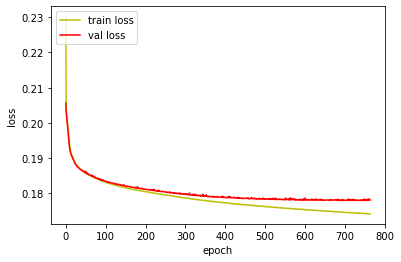

In [167]:


%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()


loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
# loss_ax.plot([hist['loss'][i] - hist['val_loss'][i] for i in range(len(hist['loss']))], 'g', label='loss - val loss')


loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper left')

plt.show()

In [169]:
from sklearn.cluster import KMeans
# Cluster Algorithm
cluster_result = KMeans(n_clusters=11).fit(all_feature)

In [170]:
dic_labels = {}
for i in labels:
    if f'{i}' not in dic_labels.keys():
        dic_labels[f'{i}'] = 1
    else:
        dic_labels[f'{i}'] += 1

for key, value in dic_labels.items():
    print(f"{key}: {value}")

11: 180
3: 180
6: 180
1: 180
5: 180
4: 180
2: 180
10: 180
7: 180
9: 180
8: 180


In [171]:
labels_ = cluster_result.labels_ + 1
dic_labels_ = {}
for i in labels_:
    if f'{i}' not in dic_labels_.keys():
        dic_labels_[f'{i}'] = 1
    else:
        dic_labels_[f'{i}'] += 1

for key, value in dic_labels_.items():
    print(f"{key}: {value}")

4: 87
9: 135
8: 514
3: 122
5: 248
6: 164
1: 126
10: 104
2: 223
11: 160
7: 97


In [172]:
# 각 label 별 리스트 나누기
# labels : 기존 라벨
# all_feature : dataset

# labels == 1 인 인덱스 : idx
# cluster_1 = all_feature[idx]

for i in range(1, 12):
#     features = np.empty((1,32))
    indexes = []
    for idx, label in enumerate(labels):
        if label == i:
            indexes.append(idx)
    features = all_feature[indexes]
    result = cluster_result.predict(features)
    print(result)
#     print(features)
#     print(features.shape)

# 리스트 별로 predict 진행
# 결과 저장

[ 2  2  9  9  2  9  9  2  2  9  2  9  2  9  9  2  9 10  2  2  9  5  9  9
  9  5 10  2  5  9  5  2  2  2  2  2  9  2  9  2  2  9  3  2  0  2  9  2
  2  2  9  9  9  2  5  9  9  9  2  9  2  2  2  9  9  9  2  2  9  2 10  9
  9  1  9  2  9  2  9  9  2  9  9 10  9  2  2  9  9 10 10  9  9  9 10  2
  9  2  2  9  2  2  9  1  2  9  2  9  1  2  2  2  9 10  2  1  2  2 10 10
  2  9  2  2  2  2  5  2  9 10  9  2  2  9  2  2  2  2  9  5  9  2  2  2
  9  9  9  9  2  2  2  9 10  9  2  9  9  2  9 10  2  9  9  9  2  2  9  2
  9  2  9  9  9  9  9  9  9  2  9  1]
[ 0  4  0  4  6  4  3  4  8  6  7  0  4  8  3  4  3  6  8  7  4  7  8  0
  8  7  3  0  0  8  4  8  3  7  4  0  3  8  1  3  4  4  6  4  8  3  4  0
  6  8  8  3  6  3  4  8  5  8  8  7  8  4  7  8  3  6  4  3  6  0  6  7
  8  8  4  4  4  9  7  4  3  8  8  8  0  7  4  4  1  8  6  4  8  4  8  8
  8  4  6  3  7  0  6  4  7  6  4  8  4  0  4  4  8  4  4  3  0  7  4  6
  8  4  3  4  7  7  4  6  8  0  0  8  4  4  7  4  8  4 10  7  8  8  4  7
  6  8  0  4 

In [ ]:
autoencoder.save("insectWing_dimension_32_")